**Bike Sharing Dataset**


16 features:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

Target value: Daily aggregated count of rented bikes.

---

Predict count of rented bikes with changes in season and environment.

(Supervised machine learning regression problem to predict a number based on the input features.)




In [ ]:
#import libraries

import os
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#import data

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#check shape and properties of data and check for null values

df.shape
df.info()
df.isnull().sum().sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see that there are no null values in the dataset. If there were, then to handle the missing data, rows/columns would have to be dropped or the values would have to be imputed.

In [ ]:
#feature extraction

#extracting date from dteday
df['dteday'] = pd.to_datetime(df['dteday'])
df['date'] = df['dteday'].dt.day
df = df.drop(columns=['dteday', 'instant'])
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30


In [ ]:
#rename titles
df.rename(columns={'weathersit':'weather_condition',
                    'hum':'humidity',
                    'mnth':'month',
                    'cnt':'count',
                    'hr':'hour',
                    'yr':'year',
                    'atemp':'apparent_temp'},inplace=True)


In [ ]:
df.describe()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,apparent_temp,humidity,windspeed,casual,registered,count,date
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


In [ ]:
#convert season, year, month, holiday, weekday, workingday, weather_condition, date to categories

categoryFeatureList = ['season', 'year', 'month', 'holiday', 
                       'weekday', 'workingday', 'weather_condition', 'date']

for var in categoryFeatureList:
  df[var] = df[var].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             731 non-null    category
 1   year               731 non-null    category
 2   month              731 non-null    category
 3   holiday            731 non-null    category
 4   weekday            731 non-null    category
 5   workingday         731 non-null    category
 6   weather_condition  731 non-null    category
 7   temp               731 non-null    float64 
 8   apparent_temp      731 non-null    float64 
 9   humidity           731 non-null    float64 
 10  windspeed          731 non-null    float64 
 11  casual             731 non-null    int64   
 12  registered         731 non-null    int64   
 13  count              731 non-null    int64   
 14  date               731 non-null    category
dtypes: category(8), float64(4), int64(3)
memory usage: 48.6 K

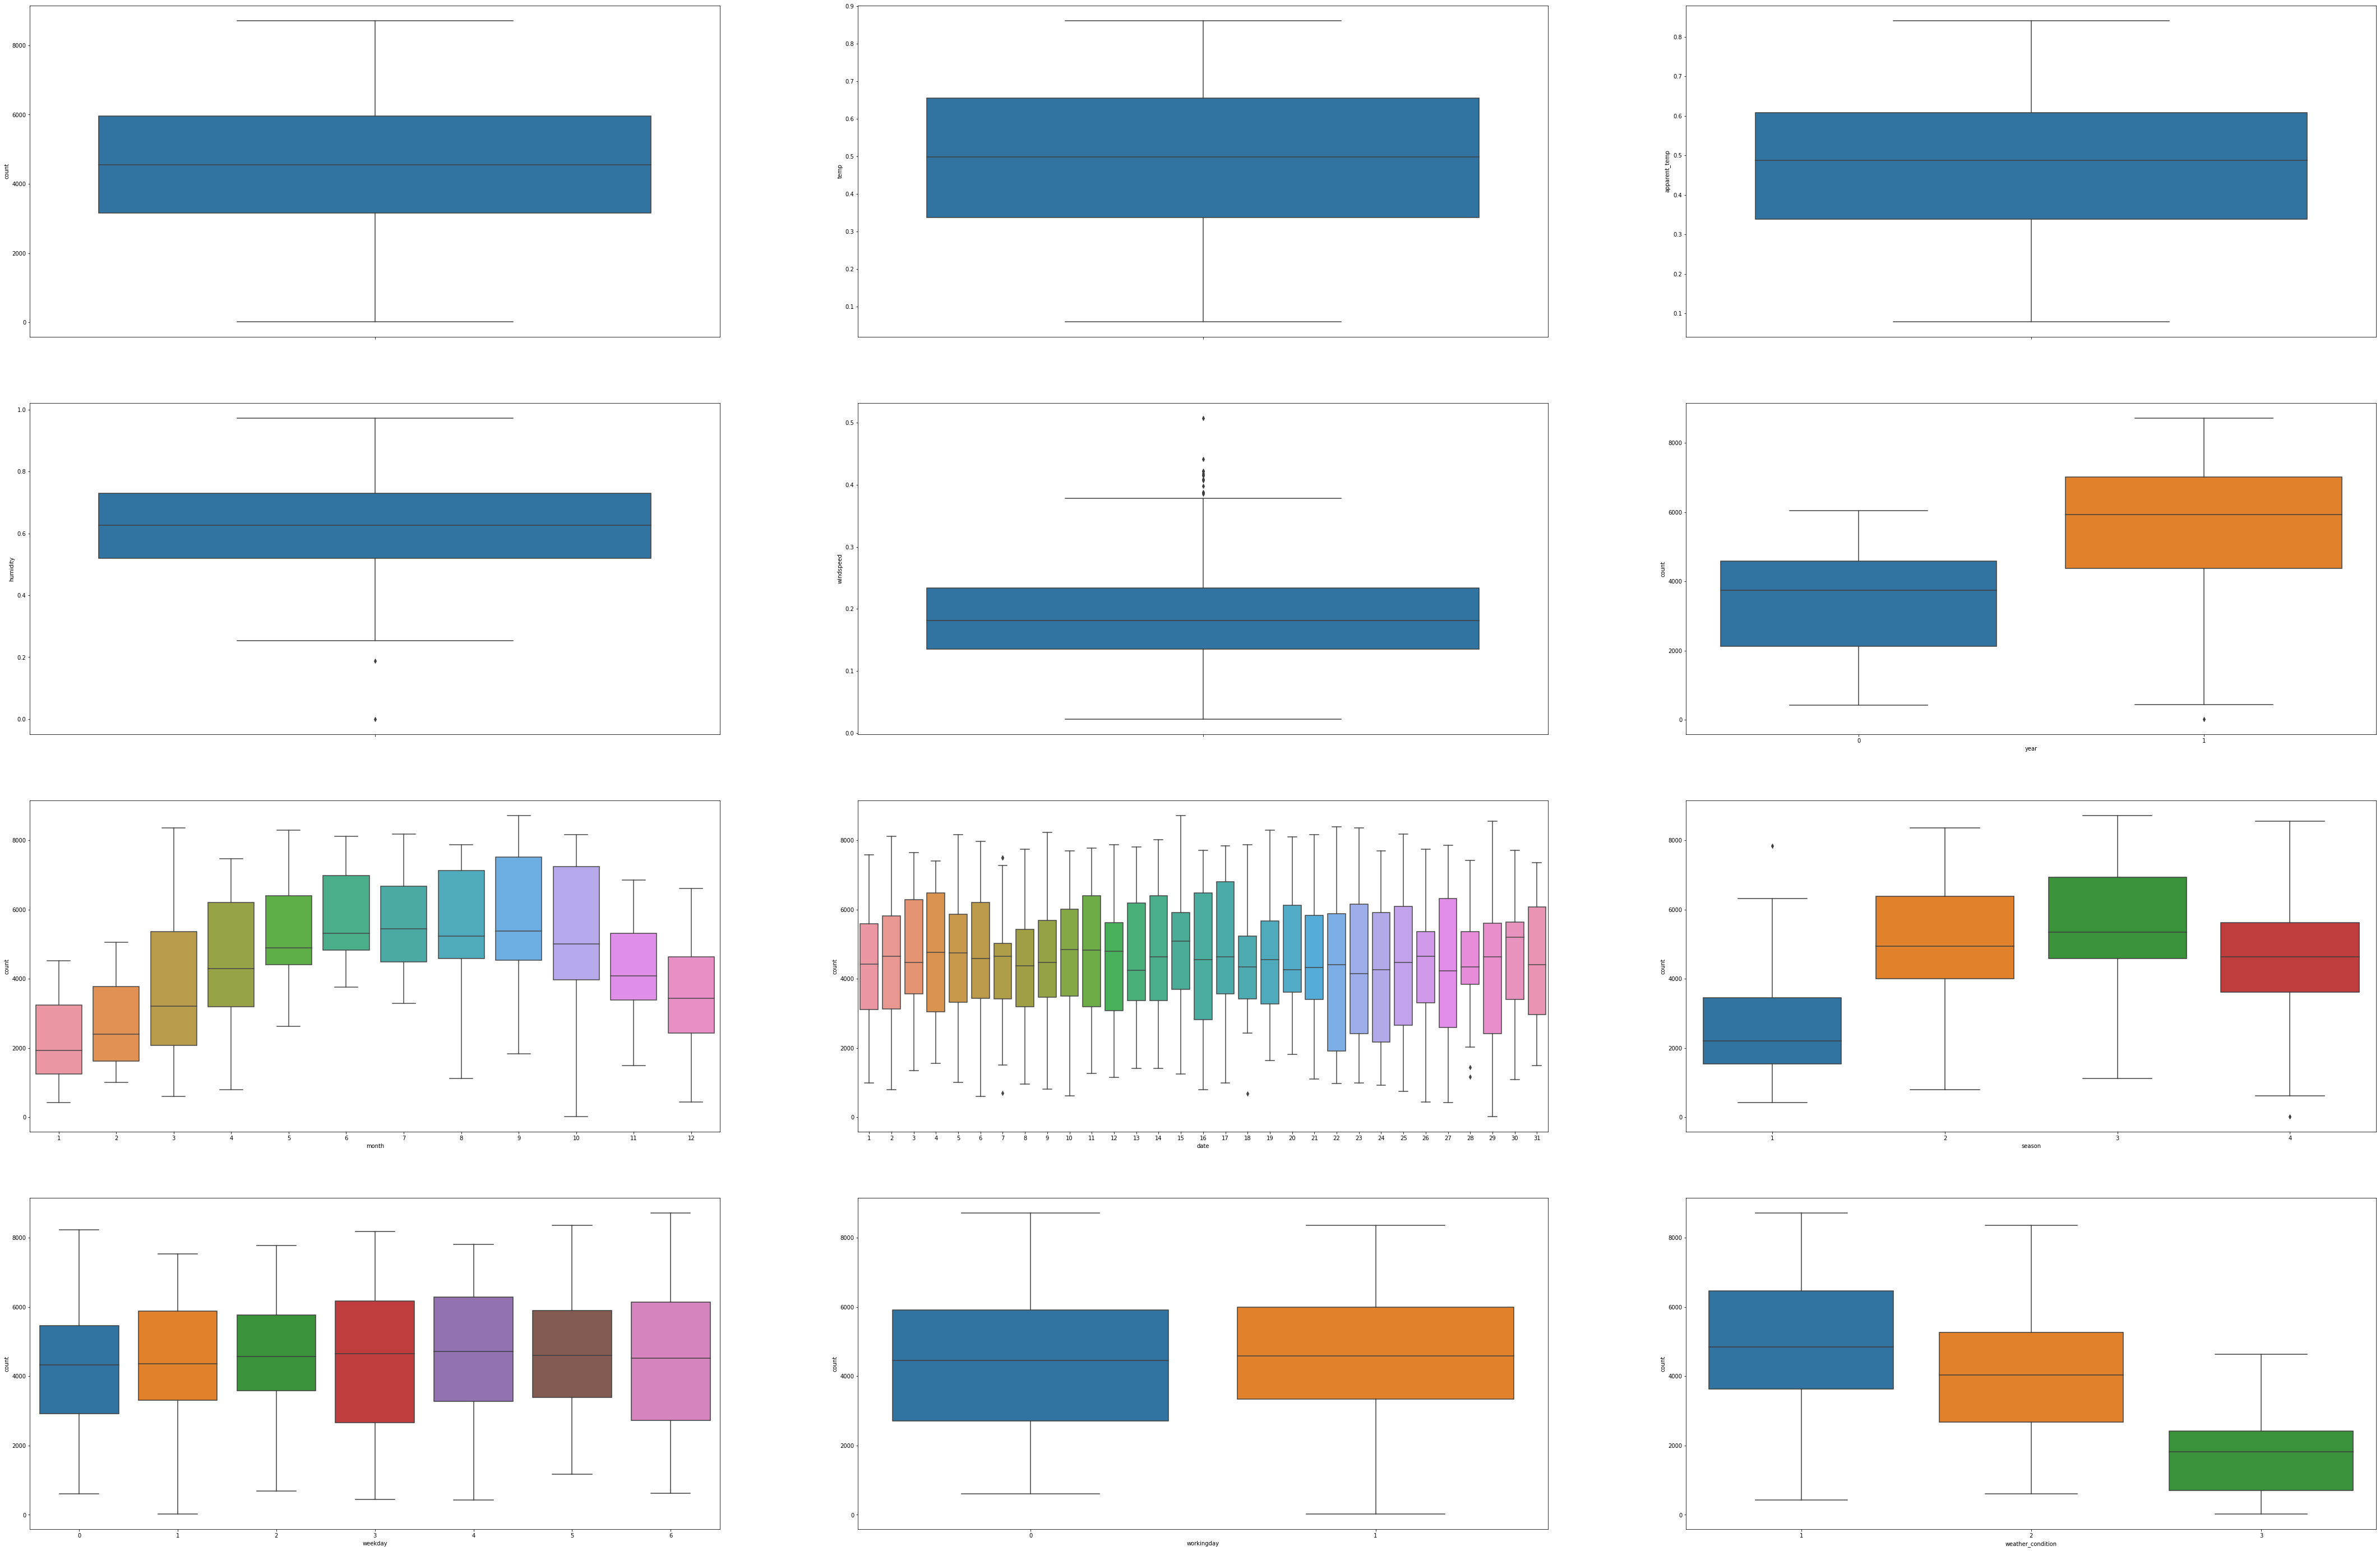

In [ ]:
#find outliers
#visualise continuous variables and count with respect to catergorical variables

fig, axes = plt.subplots(4,3)
fig.set_size_inches(75,50)


#plot total counts on y bar
sns.boxplot(data=df, y= 'count', ax=axes[0][0])

#plot temp on y bar
sns.boxplot(data=df, y='temp', ax=axes[0][1])

#plot apparent_temp on y bar
sns.boxplot(data=df, y='apparent_temp', ax=axes[0][2])

#plot humidity on y bar
sns.boxplot(data=df, y='humidity', ax=axes[1][0])

#plot windspeed on y bar
sns.boxplot(data=df, y='windspeed', ax=axes[1][1])

#plot total counts on y-bar and year on x-bar
sns.boxplot(data=df, y='count', x='year', ax=axes[1][2])

#plot total counts on y-bar and month on x-bar
sns.boxplot(data=df, y='count', x='month', ax=axes[2][0])

#plot total counts on y-bar and date on x-bar
sns.boxplot(data=df, y='count', x='date', ax=axes[2][1])

#plot total counts on y-bar and season on x-bar
sns.boxplot(data=df, y='count', x='season', ax=axes[2][2])

#plot total counts on y-bar and weekday on x-bar
sns.boxplot(data=df, y='count', x='weekday', ax=axes[3][0])

#plot total counts on y-bar and workingday on x-bar
sns.boxplot(data=df, y='count', x='workingday', ax=axes[3][1])

#plot total counts on y-bar and weather_condition on x-bar
sns.boxplot(data=df, y='count', x='weather_condition', ax=axes[3][2])

From the above boxplots, we can see that the dataset does not have many outliers

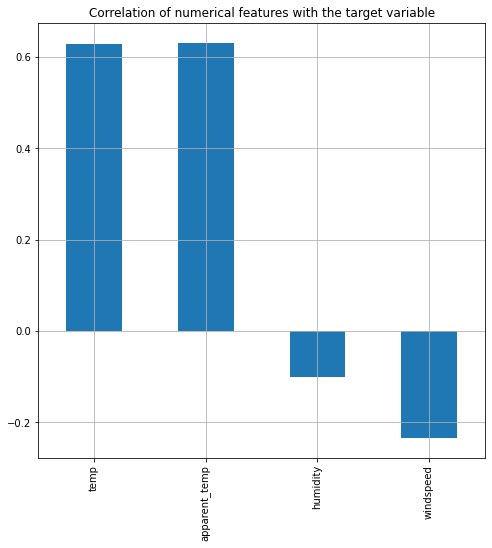

In [ ]:
#exploring correlation of independent continuous features with target variable (count)
corr = df[['temp', 'apparent_temp', 'humidity', 'windspeed']].corrwith(df['count'])
corr.plot.bar(figsize=(8,8), title='Correlation of numerical features with the target variable', grid=True, 
              legend=False, style=None, fontsize=None, colormap=None,
              label=None)

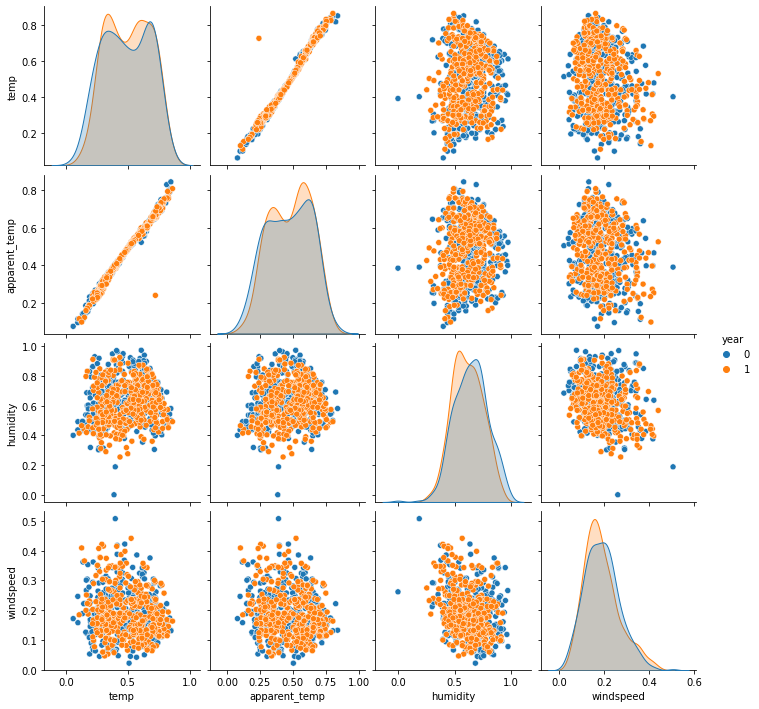

In [ ]:
#visualize relationship among all continuous variables using pairplots
NumericFeatureList=['temp', 'apparent_temp', 'humidity', 'windspeed']
sns.pairplot(df, hue='year', vars=NumericFeatureList)

We can see that temperature and apparent temperature are highly correlated, but to prove it further, we can plot a heatmap.

We can also see that the other environmental factors are not correlated.

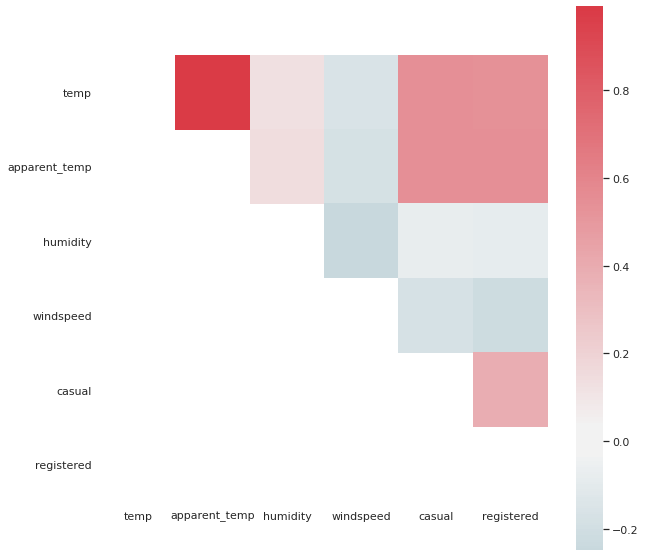

In [ ]:
#plot heatmap to check multicollinearity

#correlation matrix
sns.set(style='white')
#compute correlation matrix
corr = df.drop(columns = ['count']).corr()
#generate a mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)]=True
#set up matplotlab figure
fig, ax = plt.subplots(figsize=(10,10))
#generate custom diverging colormap
cmap=sns.diverging_palette(220, 10, s=75, l=50, sep=10, n=6,
                          center='light', as_cmap=True)

#heatmap
sns.heatmap(corr, vmin=None, vmax=None, cmap=cmap, center=0,
           robust=False, fmt='.2g', linewidths=0, 
           linecolor='white', square=True, mask=mask, ax=None)

From the heatmap, we can see that temp and apparent_temp are highly correlated, which means that the dataset has multicolinearity. To fix that, we have to drop either temp or apparent temp.

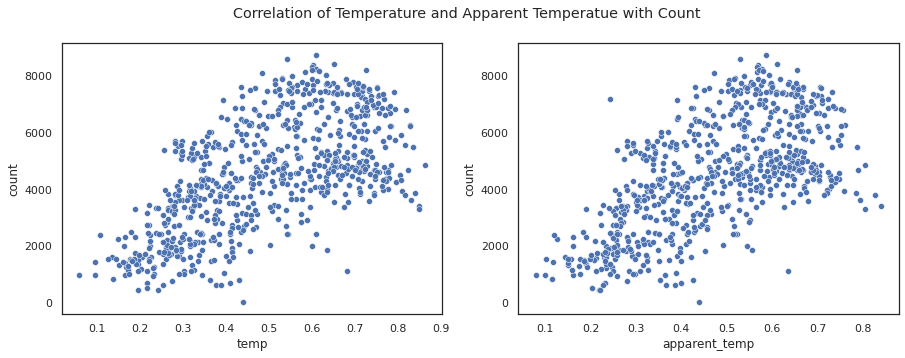

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(data=df, x='temp', y='count', ax=ax[0])
plt.suptitle('Correlation of Temperature and Apparent Temperatue with Count')
sns.scatterplot(data=df, x='apparent_temp', y='count', ax=ax[1])


From the above scatterplots, we can see that apparent_temp is more strongly correlated with count, than temp, so we can drop temp.

Text(0.5, 0.98, 'Numerical Feature: Count v/s Humidity')

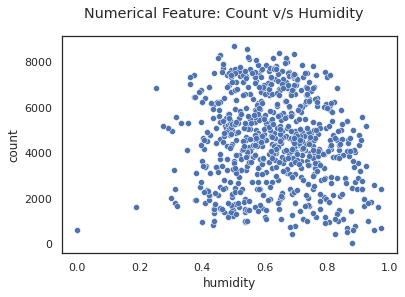

In [ ]:
sns.scatterplot(data=df, x='humidity', y='count')
plt.suptitle('Numerical Feature: Count v/s Humidity')


Higher humidity may cause an increase in demand for bike rentals.

Text(0.5, 0.98, 'Numerical Feature: Count v/s Windspeed')

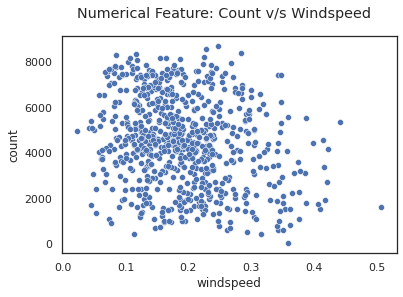

In [ ]:
sns.scatterplot(data=df, x= 'windspeed', y='count')
plt.suptitle('Numerical Feature: Count v/s Windspeed')

From the above scatter plot, as there is some spareseness when windspeed is higher, we can say that higher windspeed may cause the demand for bike rentals to be lower.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


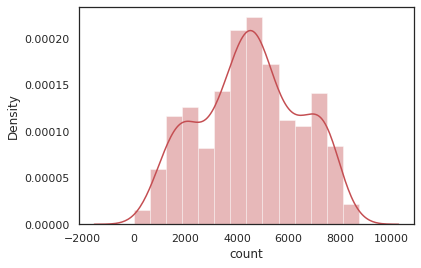

In [ ]:
#check distribution plot of target variable 'count'
sns.distplot(df['count'], color='r')

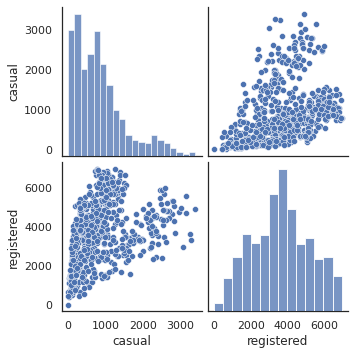

In [ ]:
CasualRegistered=['casual', 'registered']
sns.pairplot(df, vars=CasualRegistered)

Casual and Registered bike users are not really correlated and they are not necessary to help us solve our problem, which is to predict demand of bikes with changes in season and environment, so we can drop them later.

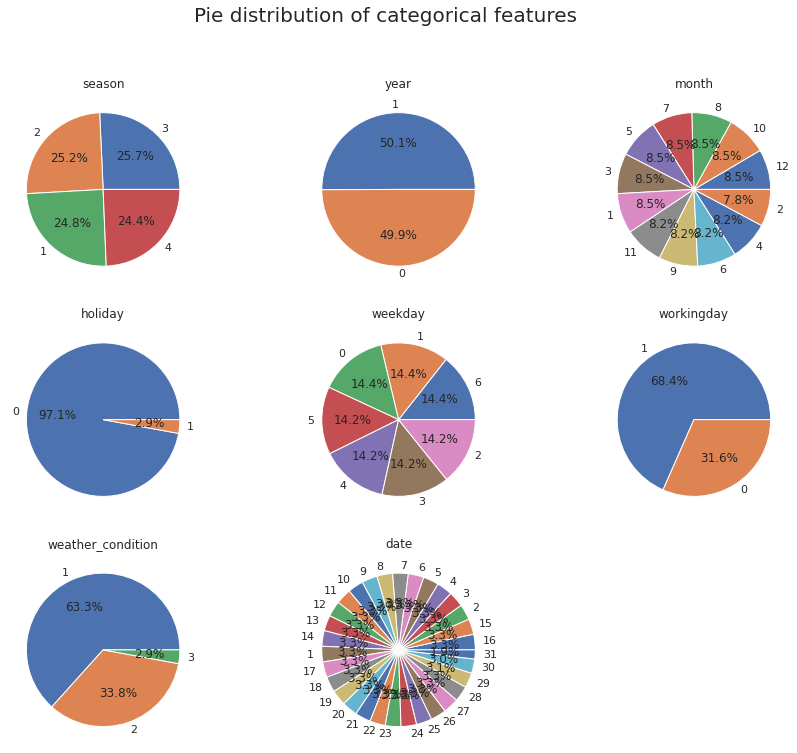

In [ ]:
#pie chart distribution of categorical variables
df_pieplot=df[categoryFeatureList]
plt.figure(figsize=(15,12))
plt.suptitle('Pie distribution of categorical features', fontsize=20)

for i in range(1, df_pieplot.shape[1]+1):
  plt.subplot(3,3,i)
  f=plt.gca()
  f.set_title(df_pieplot.columns.values[i-1])
  values=df_pieplot.iloc[:,i-1].value_counts(normalize=True).values
  index=df_pieplot.iloc[:,i-1].value_counts(normalize=True).index
  plt.pie(values,labels=index,autopct='%1.1f%%')

From the above pie charts, we can see that most of the categorical features are uniformly distributed, apart from 'holiday', 'workingday' and 'weather_condition', which makes sense, because:
1.   for 'holiday', there are fewer holidays compared to working day, so percentage is lower
2.   for 'workingday', percentage of not being a working day (ie. weekend or holiday) is less than percentage of working days.
3.   for 'weather_condition', extreme 
weather conditions (eg. thunderstorms) are rare, so the percentage of those are lower compared to clear skies.





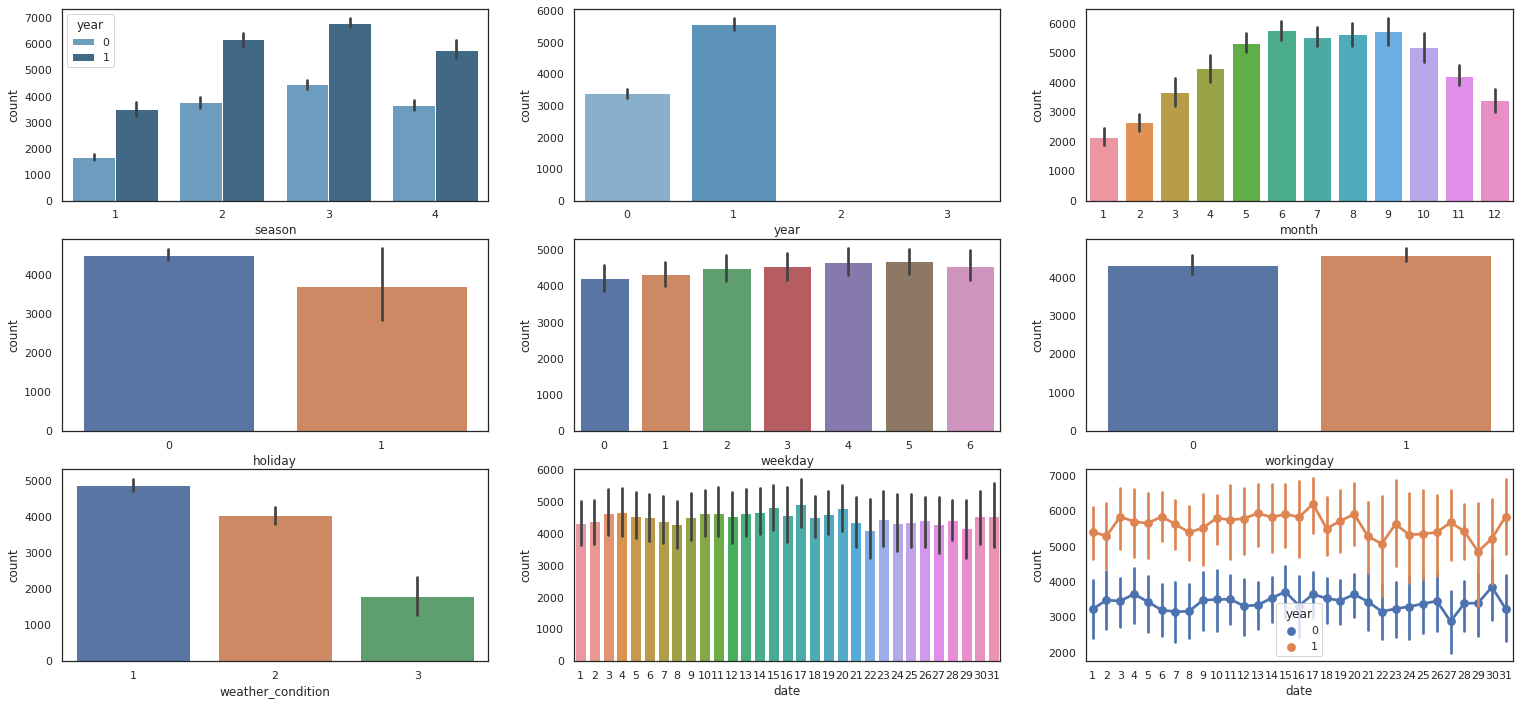

In [ ]:
#barplot of individual categorical features by count
fig, axes = plt.subplots(3, 3, figsize=(26,12))

sns.barplot(x = 'season', y = 'count', hue = 'year', data = df,
            ax = axes[0,0], palette ="Blues_d")

sns.barplot(x = 'year', y = 'count', order = [0,1,2,3], data = df,
            ax = axes[0,1], palette ="Blues_d")

sns.barplot(x = 'month', y = 'count', data = df,
            ax = axes[0,2])

sns.barplot(x = 'holiday', y = 'count', data = df,
            ax = axes[1,0])

sns.barplot(x = 'weekday', y = 'count', data = df,
            ax = axes[1,1])

sns.barplot(x = 'workingday', y = 'count', data = df,
            ax = axes[1,2])

sns.barplot(x = 'weather_condition', y = 'count', data = df,
            ax = axes[2,0])

sns.barplot(x = 'date', y = 'count', data = df, 
            ax = axes[2,1])

sns.pointplot(x = 'date', y = 'count', hue = 'year', data = df,
            markers='o', linestyles='-', dodge=False, join=True, ax = axes[2,2])

We can see that date does not seem to have an effect on count either, so it can also be dropped.

In [ ]:
#Feature selection
df = df.drop(columns = ['year', 'casual', 'registered', 'date'])
df

,season,month,holiday,weekday,workingday,temp,apparent_temp,humidity,windspeed,count
0,1,1,0,6,0,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,0.255833,0.231700,0.483333,0.350754,1796


In [ ]:
#normalizing data

x = df.drop(['count'], axis=1)  
y = df['count']


In [ ]:
#splitting dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 0)
print(x_train)

    season month holiday weekday  ...      temp  apparent_temp  humidity  windspeed
524      2     6       0       5  ...  0.649167       0.597862  0.467917   0.175383
12       1     1       0       4  ...  0.165000       0.150883  0.470417   0.301000
161      2     6       0       6  ...  0.725000       0.678038  0.654583   0.154850
556      3     7       0       2  ...  0.720833       0.664796  0.667500   0.151737
502      2     5       0       4  ...  0.593333       0.572613  0.520000   0.229475
..     ...   ...     ...     ...  ...       ...            ...       ...        ...
707      4    12       0       6  ...  0.381667       0.389508  0.911250   0.101379
192      3     7       0       2  ...  0.794167       0.739275  0.559167   0.200254
629      3     9       0       5  ...  0.599167       0.571971  0.668750   0.154229
559      3     7       0       5  ...  0.731667       0.667933  0.485833   0.080850
684      4    11       0       4  ...  0.321667       0.324492  0.620417   0

**Model Building:**






Mean Squared Error:  2168775.4031964582
R score:  0.47450515752556943
Mean Absolute Error:  1257.5340190893503


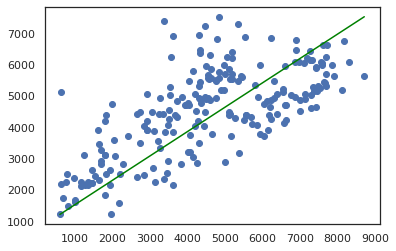

In [ ]:
#Multiple Linear Regression
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)


print("Mean Squared Error: ", mse)
print("R score: ", r)
print("Mean Absolute Error: ", mae)

x1 = min(y_test)
x2 = max(y_test)
y1 = min(y_predicted)
y2 = max(y_predicted)

plt.scatter(y_test, y_predicted)
plt.plot([x1, x2], [y1, y2], color= 'green')
plt.show()

Mean Squared Error:  1870031.703146118
R score:  0.5468908335005018
Mean Absolute Error:  1196.6492870551867


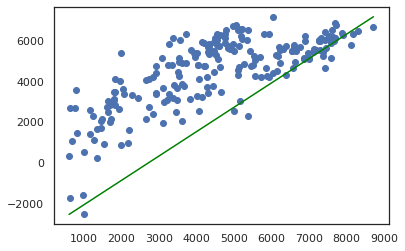

In [ ]:
#Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)

x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly, y_train)

y_predicted_poly = model.predict(x_poly_test)

poly_mse= mean_squared_error(y_test, y_predicted_poly)
poly_r = r2_score(y_test, y_predicted_poly)
poly_mae = mean_absolute_error(y_test, y_predicted_poly)

print("Mean Squared Error: ", poly_mse)
print("R score: ", poly_r)
print("Mean Absolute Error: ", poly_mae)

x1 = min(y_test)
x2 = max(y_test)
y1 = min(y_predicted_poly)
y2 = max(y_predicted_poly)


plt.scatter(y_test, y_predicted_poly)
plt.plot([x1, x2], [y1, y2], color= 'green')
plt.show()

In [ ]:
#display all algorithms in a pretty table

table = PrettyTable()

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          Lasso(alpha=0.1),
          Ridge(alpha=.5),
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  mse = mean_squared_error(y_test, y_res)
  score = model.score(x_test, y_test)
  mae = mean_absolute_error(y_test, y_res)
  
  table.add_row([type(model).__name__, format(mse, '.2f'),
                 format(score, '.2f'), format(mae, '.2f')])
  

table.add_row(["Polynomial Regression", format(poly_mse, '.2f'),
               format(poly_r, '.2f'), format(poly_mae, '.2f')])
print(table)

+-----------------------+--------------------+-----------+---------------------+
|         Model         | Mean Squared Error | R_2 Score | Mean Absolute Error |
+-----------------------+--------------------+-----------+---------------------+
|    LinearRegression   |     2168775.40     |    0.47   |       1257.53       |
|          SVR          |     4074790.76     |    0.01   |       1663.46       |
|         Lasso         |     2168631.70     |    0.47   |       1257.60       |
|         Ridge         |     2149892.47     |    0.48   |       1254.52       |
| Polynomial Regression |     1870031.70     |    0.55   |       1196.65       |
+-----------------------+--------------------+-----------+---------------------+


In [ ]:
#Cross validation
#display all algorithms in a pretty table

table = PrettyTable()
print("After Cross Validation:")

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          Lasso(alpha=0.1),
          Ridge(alpha=.5),
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  
  reg_mse = cross_val_score(estimator=model, X=x, y=y, scoring='neg_mean_squared_error', cv=10)
  score_mse = reg_mse.mean() * -1

  reg_mae = cross_val_score(estimator=model, X=x, y=y, scoring='neg_mean_absolute_error', cv=10)
  score_mae = reg_mae.mean() * -1

  reg_r2 = cross_val_score(estimator=model, X=x, y=y, scoring='r2', cv=10)
  score_r2 = reg_r2.mean()
  
  table.add_row([type(model).__name__, format(score_mse, '.2f'),
                 format(score_r2, '.2f'), format(score_mae, '.2f')])
  
print(table)

After Cross Validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1313991.1866265535, tolerance: 215148.17779042554
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1313991.1866265535, tolerance: 215148.17779042554
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1313991.1866265535, tolerance: 215148.17779042554
  positive)


+------------------+--------------------+-----------+---------------------+
|      Model       | Mean Squared Error | R_2 Score | Mean Absolute Error |
+------------------+--------------------+-----------+---------------------+
| LinearRegression |     2916288.08     |   -3.98   |       1481.48       |
|       SVR        |     4198302.07     |   -6.34   |       1688.55       |
|      Lasso       |     2907074.36     |   -3.97   |       1480.72       |
|      Ridge       |     2841077.24     |   -3.86   |       1471.61       |
+------------------+--------------------+-----------+---------------------+


In [ ]:
x = df.drop(['month', 'holiday', 'weekday', 'workingday', 'count', 'humidity', 'windspeed', 'apparent_temp', 'season'], axis=1)
print(x)

         temp
0    0.344167
1    0.363478
2    0.196364
3    0.200000
4    0.226957
..        ...
726  0.254167
727  0.253333
728  0.253333
729  0.255833
730  0.215833

[731 rows x 1 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 0)

Mean Squared Error:  2562318.552825057
R score:  0.3791495503399791
Mean Absolute Error:  1351.0994974986231


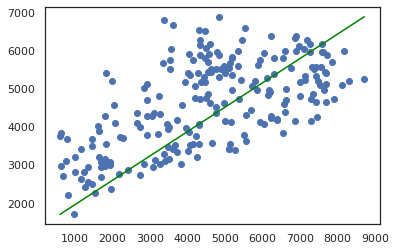

In [ ]:
#Linear Regression
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print("Mean Squared Error: ", mse)
print("R score: ", r)
print("Mean Absolute Error: ", mae)

x1 = min(y_test)
x2 = max(y_test)
y1 = min(y_predicted)
y2 = max(y_predicted)


plt.scatter(y_test, y_predicted)
plt.plot([x1, x2], [y1, y2], color= 'green')
plt.show()

In [ ]:

table = PrettyTable()

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          Lasso(alpha=0.1),
          Ridge(alpha=.5),
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  mse = mean_squared_error(y_test, y_res)
  score = model.score(x_test, y_test)
  mae = mean_absolute_error(y_test, y_res)
  
  table.add_row([type(model).__name__, format(mse, '.2f'),
                 format(score, '.2f'), format(mae, '.2f')])
  

table.add_row(["Polynomial Regression", format(poly_mse, '.2f'),
               format(poly_r, '.2f'), format(poly_mae, '.2f')])
print(table)

+-----------------------+--------------------+-----------+---------------------+
|         Model         | Mean Squared Error | R_2 Score | Mean Absolute Error |
+-----------------------+--------------------+-----------+---------------------+
|    LinearRegression   |     2562318.55     |    0.38   |       1351.10       |
|          SVR          |     3920747.92     |    0.05   |       1629.68       |
|         Lasso         |     2562438.84     |    0.38   |       1351.13       |
|         Ridge         |     2570678.60     |    0.38   |       1353.21       |
| Polynomial Regression |     1870031.70     |    0.55   |       1196.65       |
+-----------------------+--------------------+-----------+---------------------+


In [ ]:
#Cross validation
#display all algorithms in a pretty table

table = PrettyTable()
print("After Cross Validation:")

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          Lasso(alpha=0.1),
          Ridge(alpha=.5),
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  
  reg_mse = cross_val_score(estimator=model, X=x, y=y, scoring='neg_mean_squared_error', cv=10)
  score_mse = reg_mse.mean() * -1

  reg_mae = cross_val_score(estimator=model, X=x, y=y, scoring='neg_mean_absolute_error', cv=10)
  score_mae = reg_mae.mean() * -1

  reg_r2 = cross_val_score(estimator=model, X=x, y=y, scoring='r2', cv=10)
  score_r2 = reg_r2.mean()
  
  table.add_row([type(model).__name__, format(score_mse, '.2f'),
                 format(score_r2, '.2f'), format(score_mae, '.2f')])
  
print(table)

After Cross Validation:
+------------------+--------------------+-----------+---------------------+
|      Model       | Mean Squared Error | R_2 Score | Mean Absolute Error |
+------------------+--------------------+-----------+---------------------+
| LinearRegression |     2902739.31     |   -3.73   |       1429.24       |
|       SVR        |     3990711.90     |   -5.93   |       1640.91       |
|      Lasso       |     2902784.96     |   -3.73   |       1429.26       |
|      Ridge       |     2897034.27     |   -3.73   |       1428.22       |
+------------------+--------------------+-----------+---------------------+


In [ ]:
df

,season,month,holiday,weekday,workingday,temp,apparent_temp,humidity,windspeed,count
0,1,1,0,6,0,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,0.255833,0.231700,0.483333,0.350754,1796
